# 피마 인디언 당뇨병 예측

In [25]:
def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print(confusion)
    print()
    print(f' 정확도: {accuracy:.4f}, \n 정밀도: {precision:.4f}, \n 재현율: {recall:.4f}, \n f1_score: {f1:.4f}, \n AUC: {roc_auc:.4f}')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler

In [5]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [8]:
diabetes = pd.read_csv('./data/diabetes.csv')

In [9]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
diabetes[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


-----------

## 결측치 확인하기

In [73]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


> Null값 없음 확인 -> 피처 타입이 모두 숫자형으로, 별도의 피처 인코딩 필요하지 않음

---------------

## 예측 모델 생성

In [75]:
X = diabetes.iloc[: , :-1]  # 피처 데이터 세트
y = diabetes.iloc[: , -1]  # 레이블 데이터 세트

In [13]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 156, stratify = y)  # 학습 데이터 세트와 테스트 데이터 세트로 분리하기

> stratify = y

: 지정한 데이터 비율을 유지함<br>
기본값이 'y'이기 때문에 위 식에서 생략 가능

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
# 학습/예측/평가
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

In [87]:
get_clf_eval(y_test, pred, pred_proba)

[[87 13]
 [22 32]]

 정확도: 0.7727, 
 정밀도: 0.7111, 
 재현율: 0.5926, 
 f1_score: 0.6465, 
 AUC: 0.8083


--------

## 재현율 높이기

> 정밀도 재현율 곡선을 보고 임곗값별 정밀도와 재현율 값의 변화를 확인해보자.

In [109]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

In [99]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1] # 레이블 값이 1일 때의 예측 확률을 추출

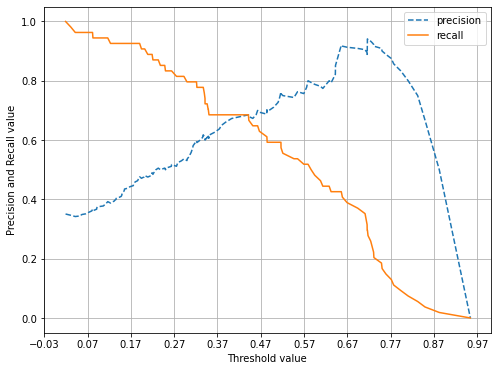

In [110]:
precision_recall_curve_plot(y_test, pred_proba_c1)

In [112]:
diabetes.describe() # 피처 값의 분포도 살펴보기

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> Glucose : 포도당 수치 -> min 값이 0인 것이 말이 되지 않음 -> Glucose 피처의 히스토그램을 확인해보자.

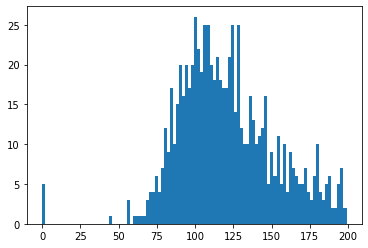

In [113]:
plt.hist(diabetes['Glucose'], bins = 100)
plt.show()

0 값으로 5개가 존재하는 것을 알 수 있다.

----------

### 0을 각 컬럼의 평균으로 대체하기

In [114]:
zero_features = ['Glucose', 'BloodPressure', 'Insulin', 'BMI'] # 0값을 검사할 피처명 리스트 생성

diabetes[zero_features].mean() # 평균 구하기
diabetes[zero_features].replace(0, diabetes[zero_features].mean()) # 0값을 평균으로 대체하기
diabetes # 확인

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


---------

### 표준화

In [118]:
X = diabetes.iloc[: , :-1]
y = diabetes.iloc[: , -1]

scaler = StandardScaler() 
X = scaler.fit_transform(X) # 피처 데이터 세트에 일괄적으로 스케일링 적용

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 156) # 학습 데이터 세트와 테스트 데이터 세트 분리하기

# 학습/예측/평가
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

[[85 12]
 [25 32]]

 정확도: 0.7597, 
 정밀도: 0.7273, 
 재현율: 0.5614, 
 f1_score: 0.6337, 
 AUC: 0.8399


> 결론: 데이터 변환과 스케일링을 통해 성능 수치가 일정 수준 개선됨(하지만, 이번 결과는 오히려 떨어짐)

---------------

# 정리

> 오차행렬

TN,FP,FN,TP로 매핑되는 4분면 행렬을 기반으로 예측 성능을 평가함. <br>이를 통해 분류 모델 예측 성능의 오류가 어떠한 모습으로 발생하는지 알 수 있음

> 정밀도(Precision)와 재현율(Recall) 

Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표<br>
    특히 재현율이 상대적으로 더 중요한 지표인 경우는 암 양성 예측 모델과 같이 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우임<br>

> f1 스코어

정밀도와 재현율을 결합한 평가 지표

> ROC-AUC

일반적으로 이진 분류의 성능 평가를 위해 가장 많이 사용되는 지표<br>
    AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치임

---------------

# 분류

## 결정트리

- 중요 포인트 :<br> 
    어떻게 트리를 분할할 것인가?<br>
    어떻게 트리를 분할해야 **최대한 균일한** 데이터 세트로 구성할 수 있을까?<br>
<br>
- 단점 : 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음 => **과적합(overfitting)**
<br>
- 장점 : 정보의 **'균일도'** 라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고, 직관적임, <span style="color: #2D3748; background-color:#fff5b1;">**특별한 경우를 제외하고 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요없음**</span>
<br>
- 복잡한 학습 모델은 결국 실제 상황(test data set)에 유연하게 대처할 수 없어서 예측 성능이 떨어질 수밖에 없음  
즉, <span style='background-color: #ffdce0'>**트리의 크기를 사전에 제한**</span>하는 것이 오히려 성능 튜닝에 더 도움됨

-----------------

### 불순물(균일도)을 측정하는 대표적인 방법

1. 엔트로피를 이용한 **정보 이득(Information Gain) 지수** <br>
<span style="color: #2D3748; background-color:#fff5b1;">**"1 - 엔트로피 지수"**</span>
<br>
<br>
2. **지니 계수**<br>
<span style="color: #2D3748; background-color:#fff5b1;">**지니 계수가 낮을수록 데이터의 균일도가 높음**</span>  
경제학에서는 불평등 지수를 나타내며, 0과 가까울수록 평등하고 1과 가까울수록 불평등함

----------

### 결정 트리 파라미터

#### <span style='background-color: #ffdce0'>min_samples_split</span>

: **"자식 노드를 분할하기 위한"** 최소한의 샘플 데이터 수<br>
default = 2 (작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가)

#### min_samples_leaf

: **"분할이 될 경우 왼쪽과 오른쪽의 브랜치 노드에서 가져야 할"** 최소한의 샘플 데이터 수

#### <span style='background-color: #ffdce0'>max_features</span>

: **"최적의 분할을 위해" 고려할 최대 피처 개수**<br>
default = **None**(**전체 피처** 선정)<br>

#### <span style='background-color: #ffdce0'>max_depth</span>

: **트리의 최대 깊이**<br>
default = None (완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴)

#### max_leaf_nodes

: **말단 노드의 최대 개수**

------------

### 결정 트리 모델 시각화

결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지 시각적으로 보여줌

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [19]:
dt_clf = DecisionTreeClassifier(random_state = 156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = .2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [26]:
# !pip install graphviz

import graphviz
from sklearn.tree import export_graphviz

In [21]:
export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)

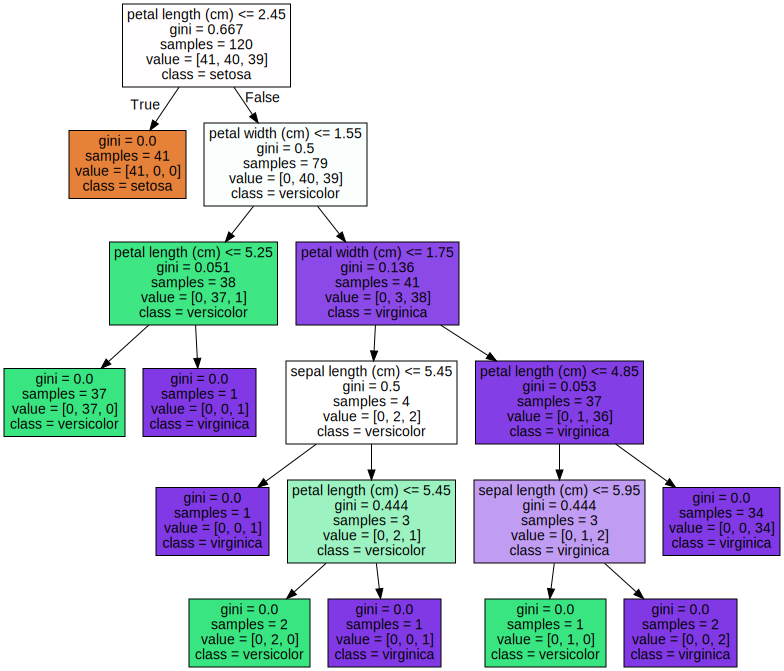

In [25]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

=> <br>
각 규칙에 따라 트리의 브랜치 노드와 리프 노드가 어떻게 수어되는지 한눈에 알 수 있음  
리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 됨  
<br>
각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미함  
색깔이 짙어질수록 지니 계수가 낮고, 해당 레이블에 속하는 샘플 데이터가 많다는 의미임

### feature_importances_

피처의 중요한 역할 지표  
예외는 있지만, 일반적으로 값이 높을수록 해당 피처의 중요도 높음

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

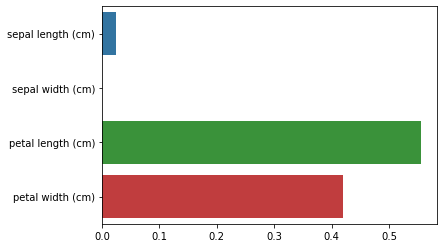

In [46]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names) 

petal_length 가 가장 피처 중요도가 높음

------------

### 결정 트리 실습 - 사용자 행동 인식 데이터

#### 책 코드

In [29]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 22.0 MB/s eta 0:00:00
     ------------------------------------- 965.4/965.4 kB 20.3 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB ? eta 0:00:00
     -------------------------------------- 162.0/162.0 kB 9.5 MB/s eta 0:00:00


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('D:/python/data/datasets/datasets/UCI HAR Dataset/features.txt',sep='\s+', header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:10] # 전체 피처명에서 10개만 추출

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [35]:
feature_dup_df = feature_name_df.groupby('column_name').count()
feature_dup_df[:3]

,column_index
column_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1


In [37]:
feature_dup_df[feature_dup_df['column_index'] > 1].count()

column_index    42
dtype: int64

=> 총 42개의 피처명 중복

In [38]:
feature_dup_df[feature_dup_df['column_index'] > 1].head(10)

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3
"fBodyAcc-bandsEnergy()-25,32",3
"fBodyAcc-bandsEnergy()-25,48",3
"fBodyAcc-bandsEnergy()-33,40",3
"fBodyAcc-bandsEnergy()-33,48",3


In [40]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0],  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [44]:
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('D:/python/data/datasets/datasets/UCI HAR Dataset/features.txt',sep='\s+',
                        header=None, names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('D:/python/data/datasets/datasets/UCI HAR Dataset/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('D:/python/data/datasets/datasets/UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('D:/python/data/datasets/datasets/UCI HAR Dataset/train/y_train.txt',sep='\s+', header = None, names = ['action'])
    y_test = pd.read_csv('D:/python/data/datasets/datasets/UCI HAR Dataset/test/y_test.txt',sep='\s+', header = None, names = ['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


=> 피처가 전부 float 형의 숫자 형이므로 별도의 카테고리 인코딩은 수행할 필요없음

In [46]:
X_train[:5]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


=> "학습용 피처 데이터 세트를 보면 많은 컬럼의 대부분이 움직임 위치와 관련된 속성임"을 알 수 있음

In [48]:
y_train[:10]

,action
0,5
1,5
2,5
3,5
4,5
5,5
6,5
7,5
8,5
9,5


In [52]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

=> 레이블 값은 1 ~ 6까지의 6개의 값이고, 분포도는 특정 값으로 왜곡되지 않고 비교적 고르게 분포되어 있음

> 결정 트리를 이용해 동작 예측 분류 수행하기

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [55]:
# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8548


In [57]:
# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


> max_depth를 조정하며 예측 정확도에 주는 영향 살펴보기

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
params = {'max_depth' : [6, 8, 10, 12, 16, 20, 24],
          'min_samples_split' : [16]
         }

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [64]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [68]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_split=16, random_state=156)

> min_samples_split 은 16으로 고정하고, max_depth 의 변화에 따른 값 측정하기

In [71]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 16, random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(np.round(depth, 4), np.round(accuracy, 4))

6 0.8551
8 0.8717
10 0.8599
12 0.8571
16 0.8599
20 0.8565
24 0.8565


=> 복잡한 모델보다도 트리 깊이를 낮춘 단순한 모델이 더욱 효과적인 결과를 가져왔음

> max_depth와 min_samples_split을 같이 변경하면서 정확도 성능 튜닝해보기

In [72]:
params = { 'max_depth' : [8, 12, 16, 20],
           'min_samples_split' : [16, 24]
         }

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=24,
                                              min_samples_split=16,
                                              random_state=156),
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             scoring='accuracy', verbose=1)

**verbose**<br>
- 함수 수행시 발생하는 상세한 정보들을 표준 출력으로 자세히 내보낼 것인가 여부  
- 보통 0 은 출력하지 않고, 1은 자세히, 2는 함축적인 정보만 출력하는 형태  
- 자주 사용되지 않음

In [73]:
grid_cv.best_score_ # 최고 평균 정확도

0.8548794147162603

In [75]:
grid_cv.best_params_ # 최적 하이퍼 파라미터

{'max_depth': 8, 'min_samples_split': 16}

In [76]:
best_df_clf = grid_cv.best_estimator_

In [77]:
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
accuracy.round(4)

0.8717

In [81]:
ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, seaborn 막대 그래프로 쉽게 표현하기 위해 series로 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

In [84]:
# 중요도 값 순으로 series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
ftr_top20[:3]

tGravityAcc-min()-X                0.253354
fBodyAccJerk-bandsEnergy()-1,16    0.212584
angle(Y,gravityMean)               0.139001
dtype: float64

In [89]:
conda install seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Min\anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h2bbff1b_7          18 KB
    brotli-bin-1.0.9           |       h2bbff1b_7          19 KB
    kiwisolver-1.4.2           |   py39hd77b12b_0          58 KB
    libbrotlicommon-1.0.9      |       h2bbff1b_7          71 KB
    libbrotlidec-1.0.9         |       h2bbff1b_7          30 KB
    libbrotlienc-1.0.9         |       h2bbff1b_7         233 KB
    matplotlib-base-3.5.2      |   py39hd77b12b_0         5.6 MB
    seaborn-0.12.0             |   py39haa95532_0         435 KB
    ------------------------------------------------------------
                                           Total:         6.4 MB

The following NEW packages will be INSTALLED:

  brotli

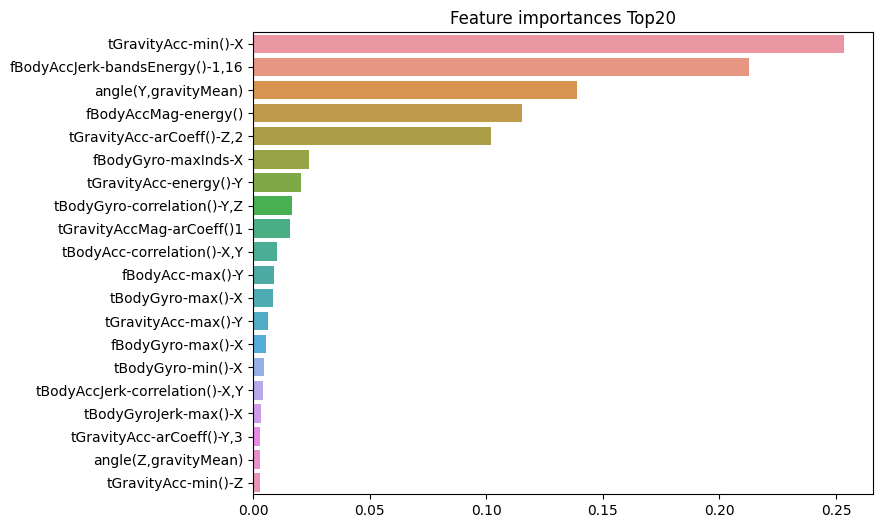

In [91]:
import seaborn as sns

plt.figure(figsize=(8,6))
plt.title('Feature importances Top20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()